In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sc
from ydata_profiling import ProfileReport
from scipy import stats as sts
import sklearn 
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression, ElasticNet
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, f1_score, mean_absolute_error, r2_score, mean_absolute_percentage_error, mean_squared_log_error, explained_variance_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer, KNNImputer
sklearn.impute.KNNImputer
from sklearn.base import BaseEstimator, TransformerMixin
import phik
from typing import Literal
from lightgbm import LGBMRegressor
import umap
import optuna
from sklearn.pipeline import Pipeline
%matplotlib

Using matplotlib backend: module://matplotlib_inline.backend_inline


In [2]:
df = pd.read_csv('data/portugal_listinigs.csv')

/var/folders/7r/2s6zh0_x6n3gn1wg626n924w0000gn/T/ipykernel_3838/499035845.py:1: DtypeWarning: Columns (6,8,12,13,14,15,16,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/portugal_listinigs.csv')


In [3]:
df

,Price,District,City,Town,Type,EnergyCertificate,Floor,Parking,HasParking,ConstructionYear,...,Elevator,ElectricCarsCharging,TotalRooms,NumberOfBedrooms,NumberOfWC,ConservationStatus,LivingArea,LotSize,BuiltArea,NumberOfBathrooms
0,250000.0,Faro,São Brás de Alportel,São Brás de Alportel,Apartment,A+,2nd Floor,1.0,True,NaN,...,True,NaN,2.0,NaN,NaN,NaN,114.0,NaN,NaN,2.0
1,9500.0,Faro,Albufeira,Albufeira e Olhos de Água,Apartment,NC,1st Floor,0.0,False,1990.0,...,True,NaN,0.0,NaN,NaN,NaN,27.0,NaN,NaN,1.0
2,580000.0,Faro,Vila do Bispo,Budens,Apartment,D,3rd Floor,1.0,True,2003.0,...,False,NaN,2.0,NaN,NaN,NaN,84.0,NaN,NaN,2.0
3,350000.0,Faro,Portimão,Portimão,Apartment,C,4th Floor,0.0,False,1985.0,...,True,NaN,2.0,NaN,NaN,NaN,68.0,NaN,NaN,1.0
4,175000.0,Faro,Faro,Faro (Sé e São Pedro),House,NC,NaN,0.0,False,1950.0,...,False,NaN,4.0,NaN,NaN,NaN,78.0,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135531,349900.0,Vila Real,Valpaços,Valpaços e Sanfins,House,F,NaN,1.0,NaN,1982.0,...,False,False,NaN,3.0,1.0,NaN,190.0,18240.0,238.00,3.0
135532,77500.0,Vila Real,Montalegre,Salto,Apartment,NC,NaN,0.0,NaN,2010.0,...,False,False,NaN,1.0,NaN,New,39.0,NaN,60.00,1.0
135533,50000.0,Vila Real,Alijó,Castedo e Cotas,House,NC,NaN,1.0,NaN,1987.0,...,False,False,NaN,2.0,1.0,NaN,84.0,NaN,84.50,2.0
135534,36000.0,Vila Real,Sabrosa,Paços,Land,NC,NaN,0.0,NaN,NaN,...,False,False,NaN,NaN,0.0,NaN,NaN,300.0,240.88,0.0


In [4]:
df.isna().sum()

Price                       300
District                      0
City                          0
Town                          2
Type                         16
EnergyCertificate            14
Floor                    107607
Parking                     194
HasParking                67321
ConstructionYear          47515
TotalArea                  8383
GrossArea                107898
EnergyEfficiencyLevel     68247
PublishDate              106297
Garage                    68247
Elevator                     32
ElectricCarsCharging      68247
TotalRooms                62292
NumberOfBedrooms          88495
NumberOfWC                78280
ConservationStatus       116244
LivingArea                30584
LotSize                   95953
BuiltArea                108919
NumberOfBathrooms          6836
dtype: int64

In [5]:
df = df.dropna(subset='Price')

In [6]:
df

,Price,District,City,Town,Type,EnergyCertificate,Floor,Parking,HasParking,ConstructionYear,...,Elevator,ElectricCarsCharging,TotalRooms,NumberOfBedrooms,NumberOfWC,ConservationStatus,LivingArea,LotSize,BuiltArea,NumberOfBathrooms
0,250000.0,Faro,São Brás de Alportel,São Brás de Alportel,Apartment,A+,2nd Floor,1.0,True,NaN,...,True,NaN,2.0,NaN,NaN,NaN,114.0,NaN,NaN,2.0
1,9500.0,Faro,Albufeira,Albufeira e Olhos de Água,Apartment,NC,1st Floor,0.0,False,1990.0,...,True,NaN,0.0,NaN,NaN,NaN,27.0,NaN,NaN,1.0
2,580000.0,Faro,Vila do Bispo,Budens,Apartment,D,3rd Floor,1.0,True,2003.0,...,False,NaN,2.0,NaN,NaN,NaN,84.0,NaN,NaN,2.0
3,350000.0,Faro,Portimão,Portimão,Apartment,C,4th Floor,0.0,False,1985.0,...,True,NaN,2.0,NaN,NaN,NaN,68.0,NaN,NaN,1.0
4,175000.0,Faro,Faro,Faro (Sé e São Pedro),House,NC,NaN,0.0,False,1950.0,...,False,NaN,4.0,NaN,NaN,NaN,78.0,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135531,349900.0,Vila Real,Valpaços,Valpaços e Sanfins,House,F,NaN,1.0,NaN,1982.0,...,False,False,NaN,3.0,1.0,NaN,190.0,18240.0,238.00,3.0
135532,77500.0,Vila Real,Montalegre,Salto,Apartment,NC,NaN,0.0,NaN,2010.0,...,False,False,NaN,1.0,NaN,New,39.0,NaN,60.00,1.0
135533,50000.0,Vila Real,Alijó,Castedo e Cotas,House,NC,NaN,1.0,NaN,1987.0,...,False,False,NaN,2.0,1.0,NaN,84.0,NaN,84.50,2.0
135534,36000.0,Vila Real,Sabrosa,Paços,Land,NC,NaN,0.0,NaN,NaN,...,False,False,NaN,NaN,0.0,NaN,NaN,300.0,240.88,0.0


<Axes: >

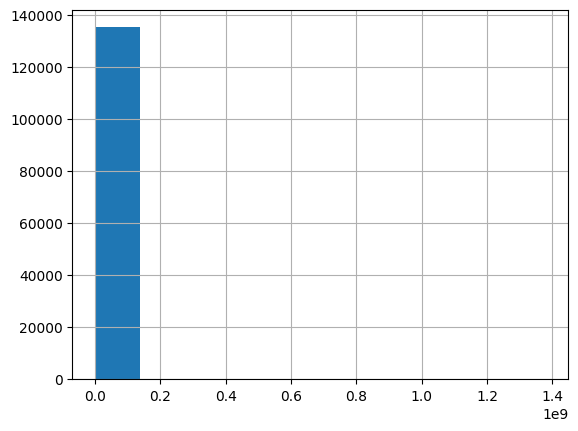

In [7]:
df['Price'].hist()

In [8]:
# profile = ProfileReport(df, minimal=True)
# profile.to_file('real_estate_report.html')

In [9]:
print(df.info(memory_usage="deep"))
print(df.memory_usage(deep=True).sum() / 1024**2, "MB")


<class 'pandas.core.frame.DataFrame'>
Index: 135236 entries, 0 to 135535
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Price                  135236 non-null  float64
 1   District               135236 non-null  object 
 2   City                   135236 non-null  object 
 3   Town                   135234 non-null  object 
 4   Type                   135220 non-null  object 
 5   EnergyCertificate      135222 non-null  object 
 6   Floor                  27846 non-null   object 
 7   Parking                135042 non-null  float64
 8   HasParking             68075 non-null   object 
 9   ConstructionYear       87866 non-null   float64
 10  TotalArea              126859 non-null  float64
 11  GrossArea              27617 non-null   float64
 12  EnergyEfficiencyLevel  67129 non-null   object 
 13  PublishDate            29226 non-null   object 
 14  Garage                 67129 non-null   o

In [10]:
df

,Price,District,City,Town,Type,EnergyCertificate,Floor,Parking,HasParking,ConstructionYear,...,Elevator,ElectricCarsCharging,TotalRooms,NumberOfBedrooms,NumberOfWC,ConservationStatus,LivingArea,LotSize,BuiltArea,NumberOfBathrooms
0,250000.0,Faro,São Brás de Alportel,São Brás de Alportel,Apartment,A+,2nd Floor,1.0,True,NaN,...,True,NaN,2.0,NaN,NaN,NaN,114.0,NaN,NaN,2.0
1,9500.0,Faro,Albufeira,Albufeira e Olhos de Água,Apartment,NC,1st Floor,0.0,False,1990.0,...,True,NaN,0.0,NaN,NaN,NaN,27.0,NaN,NaN,1.0
2,580000.0,Faro,Vila do Bispo,Budens,Apartment,D,3rd Floor,1.0,True,2003.0,...,False,NaN,2.0,NaN,NaN,NaN,84.0,NaN,NaN,2.0
3,350000.0,Faro,Portimão,Portimão,Apartment,C,4th Floor,0.0,False,1985.0,...,True,NaN,2.0,NaN,NaN,NaN,68.0,NaN,NaN,1.0
4,175000.0,Faro,Faro,Faro (Sé e São Pedro),House,NC,NaN,0.0,False,1950.0,...,False,NaN,4.0,NaN,NaN,NaN,78.0,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135531,349900.0,Vila Real,Valpaços,Valpaços e Sanfins,House,F,NaN,1.0,NaN,1982.0,...,False,False,NaN,3.0,1.0,NaN,190.0,18240.0,238.00,3.0
135532,77500.0,Vila Real,Montalegre,Salto,Apartment,NC,NaN,0.0,NaN,2010.0,...,False,False,NaN,1.0,NaN,New,39.0,NaN,60.00,1.0
135533,50000.0,Vila Real,Alijó,Castedo e Cotas,House,NC,NaN,1.0,NaN,1987.0,...,False,False,NaN,2.0,1.0,NaN,84.0,NaN,84.50,2.0
135534,36000.0,Vila Real,Sabrosa,Paços,Land,NC,NaN,0.0,NaN,NaN,...,False,False,NaN,NaN,0.0,NaN,NaN,300.0,240.88,0.0


In [11]:
df_num = df.select_dtypes(include='number')

In [12]:
df = df[df['Price'] != df['Price'].max()]
df

,Price,District,City,Town,Type,EnergyCertificate,Floor,Parking,HasParking,ConstructionYear,...,Elevator,ElectricCarsCharging,TotalRooms,NumberOfBedrooms,NumberOfWC,ConservationStatus,LivingArea,LotSize,BuiltArea,NumberOfBathrooms
0,250000.0,Faro,São Brás de Alportel,São Brás de Alportel,Apartment,A+,2nd Floor,1.0,True,NaN,...,True,NaN,2.0,NaN,NaN,NaN,114.0,NaN,NaN,2.0
1,9500.0,Faro,Albufeira,Albufeira e Olhos de Água,Apartment,NC,1st Floor,0.0,False,1990.0,...,True,NaN,0.0,NaN,NaN,NaN,27.0,NaN,NaN,1.0
2,580000.0,Faro,Vila do Bispo,Budens,Apartment,D,3rd Floor,1.0,True,2003.0,...,False,NaN,2.0,NaN,NaN,NaN,84.0,NaN,NaN,2.0
3,350000.0,Faro,Portimão,Portimão,Apartment,C,4th Floor,0.0,False,1985.0,...,True,NaN,2.0,NaN,NaN,NaN,68.0,NaN,NaN,1.0
4,175000.0,Faro,Faro,Faro (Sé e São Pedro),House,NC,NaN,0.0,False,1950.0,...,False,NaN,4.0,NaN,NaN,NaN,78.0,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135531,349900.0,Vila Real,Valpaços,Valpaços e Sanfins,House,F,NaN,1.0,NaN,1982.0,...,False,False,NaN,3.0,1.0,NaN,190.0,18240.0,238.00,3.0
135532,77500.0,Vila Real,Montalegre,Salto,Apartment,NC,NaN,0.0,NaN,2010.0,...,False,False,NaN,1.0,NaN,New,39.0,NaN,60.00,1.0
135533,50000.0,Vila Real,Alijó,Castedo e Cotas,House,NC,NaN,1.0,NaN,1987.0,...,False,False,NaN,2.0,1.0,NaN,84.0,NaN,84.50,2.0
135534,36000.0,Vila Real,Sabrosa,Paços,Land,NC,NaN,0.0,NaN,NaN,...,False,False,NaN,NaN,0.0,NaN,NaN,300.0,240.88,0.0


In [13]:
for col in df_num.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median = df_num[col].median()
    df[col] = np.where((df[col] > upper_bound) | (df[col] < lower_bound), median, df[col])

/var/folders/7r/2s6zh0_x6n3gn1wg626n924w0000gn/T/ipykernel_3838/3488598229.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = np.where((df[col] > upper_bound) | (df[col] < lower_bound), median, df[col])
/var/folders/7r/2s6zh0_x6n3gn1wg626n924w0000gn/T/ipykernel_3838/3488598229.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = np.where((df[col] > upper_bound) | (df[col] < lower_bound), median, df[col])
/var/folders/7r/2s6zh0_x6n3gn1wg626n924w0000gn/T/ipykernel_3838/3488598229.py:9: Set

<Axes: >

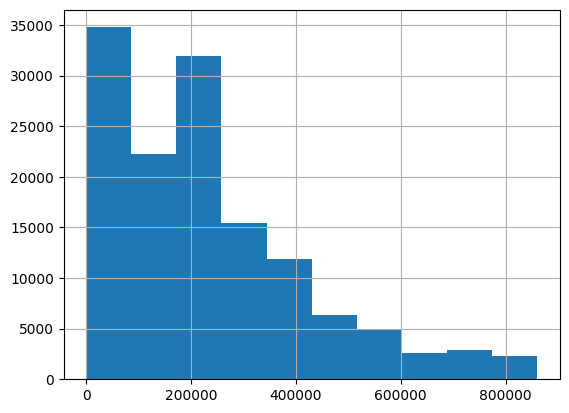

In [14]:
df['Price'].hist()

In [15]:
from geopy.geocoders import Nominatim
from tqdm import tqdm

In [17]:
geolocator = Nominatim(user_agent="city_to_coords")

def get_coordinates(city_list):
    results = []
    for city in tqdm(city_list, desc="Обработка городов"):
        try:
            location = geolocator.geocode(city)
            if location:
                results.append((city, location.latitude, location.longitude))
            else:
                results.append((city, None, None))
        except Exception as e:
            print(f"Ошибка при обработке {city}: {e}")
            results.append((city, None, None))
    return results


coords = get_coordinates(df['City'].unique())
coords


Обработка городов: 100%|██████████| 275/275 [07:38<00:00,  1.67s/it]


[('São Brás de Alportel', 37.1529622, -7.8879138),
 ('Albufeira', 37.088241, -8.2526339),
 ('Vila do Bispo', 37.0829799, -8.9096115),
 ('Portimão', 37.1375808, -8.5368426),
 ('Faro', 37.0162727, -7.9351771),
 ('Loulé', 37.1395485, -8.0232598),
 ('Lagos', 6.4550575, 3.3941795),
 ('Peniche', 39.3568749, -9.3786838),
 ('Alcoutim', 37.402329300000005, -7.669049938495098),
 ('Valpaços', 41.6067883, -7.3108525),
 ('Lagoa (Algarve)', 37.16173885, -8.50351695),
 ('Castro Marim', 37.2179367, -7.4457102),
 ('Olhão', 37.0270369, -7.8411287),
 ('Vila Real de Santo António', 37.1946052, -7.4155628),
 ('Silves', 37.26398255, -8.348731138182709),
 ('Tavira', 37.1262493, -7.6499121),
 ('Aljezur', 37.3151549, -8.8040533),
 ('Porto', 41.1494512, -8.6107884),
 ('Monchique', 37.3179725, -8.5558655),
 ('Sintra', 38.79846, -9.3881),
 ('Seia', 40.4200998, -7.7028054),
 ('Paços de Ferreira', 41.290118, -8.378194008811969),
 ('Almeida', 40.7260772, -6.9065743),
 ('Gouveia', -18.4545728, -43.7415904),
 ('Celori

In [18]:
l = []
la = []
c = []
for i in coords: 
    la.append(i[1])
    l.append(i[2])


In [19]:
df

,Price,District,City,Town,Type,EnergyCertificate,Floor,Parking,HasParking,ConstructionYear,...,Elevator,ElectricCarsCharging,TotalRooms,NumberOfBedrooms,NumberOfWC,ConservationStatus,LivingArea,LotSize,BuiltArea,NumberOfBathrooms
0,250000.0,Faro,São Brás de Alportel,São Brás de Alportel,Apartment,A+,2nd Floor,1.0,True,NaN,...,True,NaN,2.0,NaN,NaN,NaN,114.0,NaN,NaN,2.0
1,9500.0,Faro,Albufeira,Albufeira e Olhos de Água,Apartment,NC,1st Floor,0.0,False,1990.0,...,True,NaN,0.0,NaN,NaN,NaN,27.0,NaN,NaN,1.0
2,580000.0,Faro,Vila do Bispo,Budens,Apartment,D,3rd Floor,1.0,True,2003.0,...,False,NaN,2.0,NaN,NaN,NaN,84.0,NaN,NaN,2.0
3,350000.0,Faro,Portimão,Portimão,Apartment,C,4th Floor,0.0,False,1985.0,...,True,NaN,2.0,NaN,NaN,NaN,68.0,NaN,NaN,1.0
4,175000.0,Faro,Faro,Faro (Sé e São Pedro),House,NC,NaN,0.0,False,1950.0,...,False,NaN,4.0,NaN,NaN,NaN,78.0,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135531,349900.0,Vila Real,Valpaços,Valpaços e Sanfins,House,F,NaN,1.0,NaN,1982.0,...,False,False,NaN,3.0,1.0,NaN,190.0,680.0,238.00,3.0
135532,77500.0,Vila Real,Montalegre,Salto,Apartment,NC,NaN,0.0,NaN,2010.0,...,False,False,NaN,1.0,NaN,New,39.0,NaN,60.00,1.0
135533,50000.0,Vila Real,Alijó,Castedo e Cotas,House,NC,NaN,1.0,NaN,1987.0,...,False,False,NaN,2.0,1.0,NaN,84.0,NaN,84.50,2.0
135534,36000.0,Vila Real,Sabrosa,Paços,Land,NC,NaN,0.0,NaN,NaN,...,False,False,NaN,NaN,0.0,NaN,NaN,300.0,240.88,0.0


In [21]:
df['lactitude'] = df['City'].map(dict(zip(df['City'].unique(), la)))
df['longitude'] = df['City'].map(dict(zip(df['City'].unique(), l)))

/var/folders/7r/2s6zh0_x6n3gn1wg626n924w0000gn/T/ipykernel_3838/2819840563.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lactitude'] = df['City'].map(dict(zip(df['City'].unique(), la)))
/var/folders/7r/2s6zh0_x6n3gn1wg626n924w0000gn/T/ipykernel_3838/2819840563.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['longitude'] = df['City'].map(dict(zip(df['City'].unique(), l)))


In [ ]:
import re

pattern = r"\d{4}-\d{2}-\d{2}"

for i in df['PublishDate'].dropna():
    re.findall(pattern, df['PublishDate'][i])

In [45]:
df['ExtractedDate'] = df['PublishDate'].dropna().apply(lambda x: re.findall(pattern, x)[0] if re.findall(pattern, x) else None)

In [46]:
df['ExtractedDate'].unique()

0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
             ...    
135531           NaN
135532           NaN
135533           NaN
135534    2022-07-07
135535    2023-01-05
Name: ExtractedDate, Length: 135235, dtype: object

In [50]:
df['ExtractedDate'] = pd.to_datetime(df['ExtractedDate'])

In [52]:
df = df.drop(columns=['PublishDate'])

interval columns not set, guessing: ['Price', 'Parking', 'ConstructionYear', 'TotalArea', 'GrossArea', 'TotalRooms', 'NumberOfBedrooms', 'NumberOfWC', 'LivingArea', 'LotSize', 'BuiltArea', 'NumberOfBathrooms', 'lactitude', 'longitude']


<Axes: >

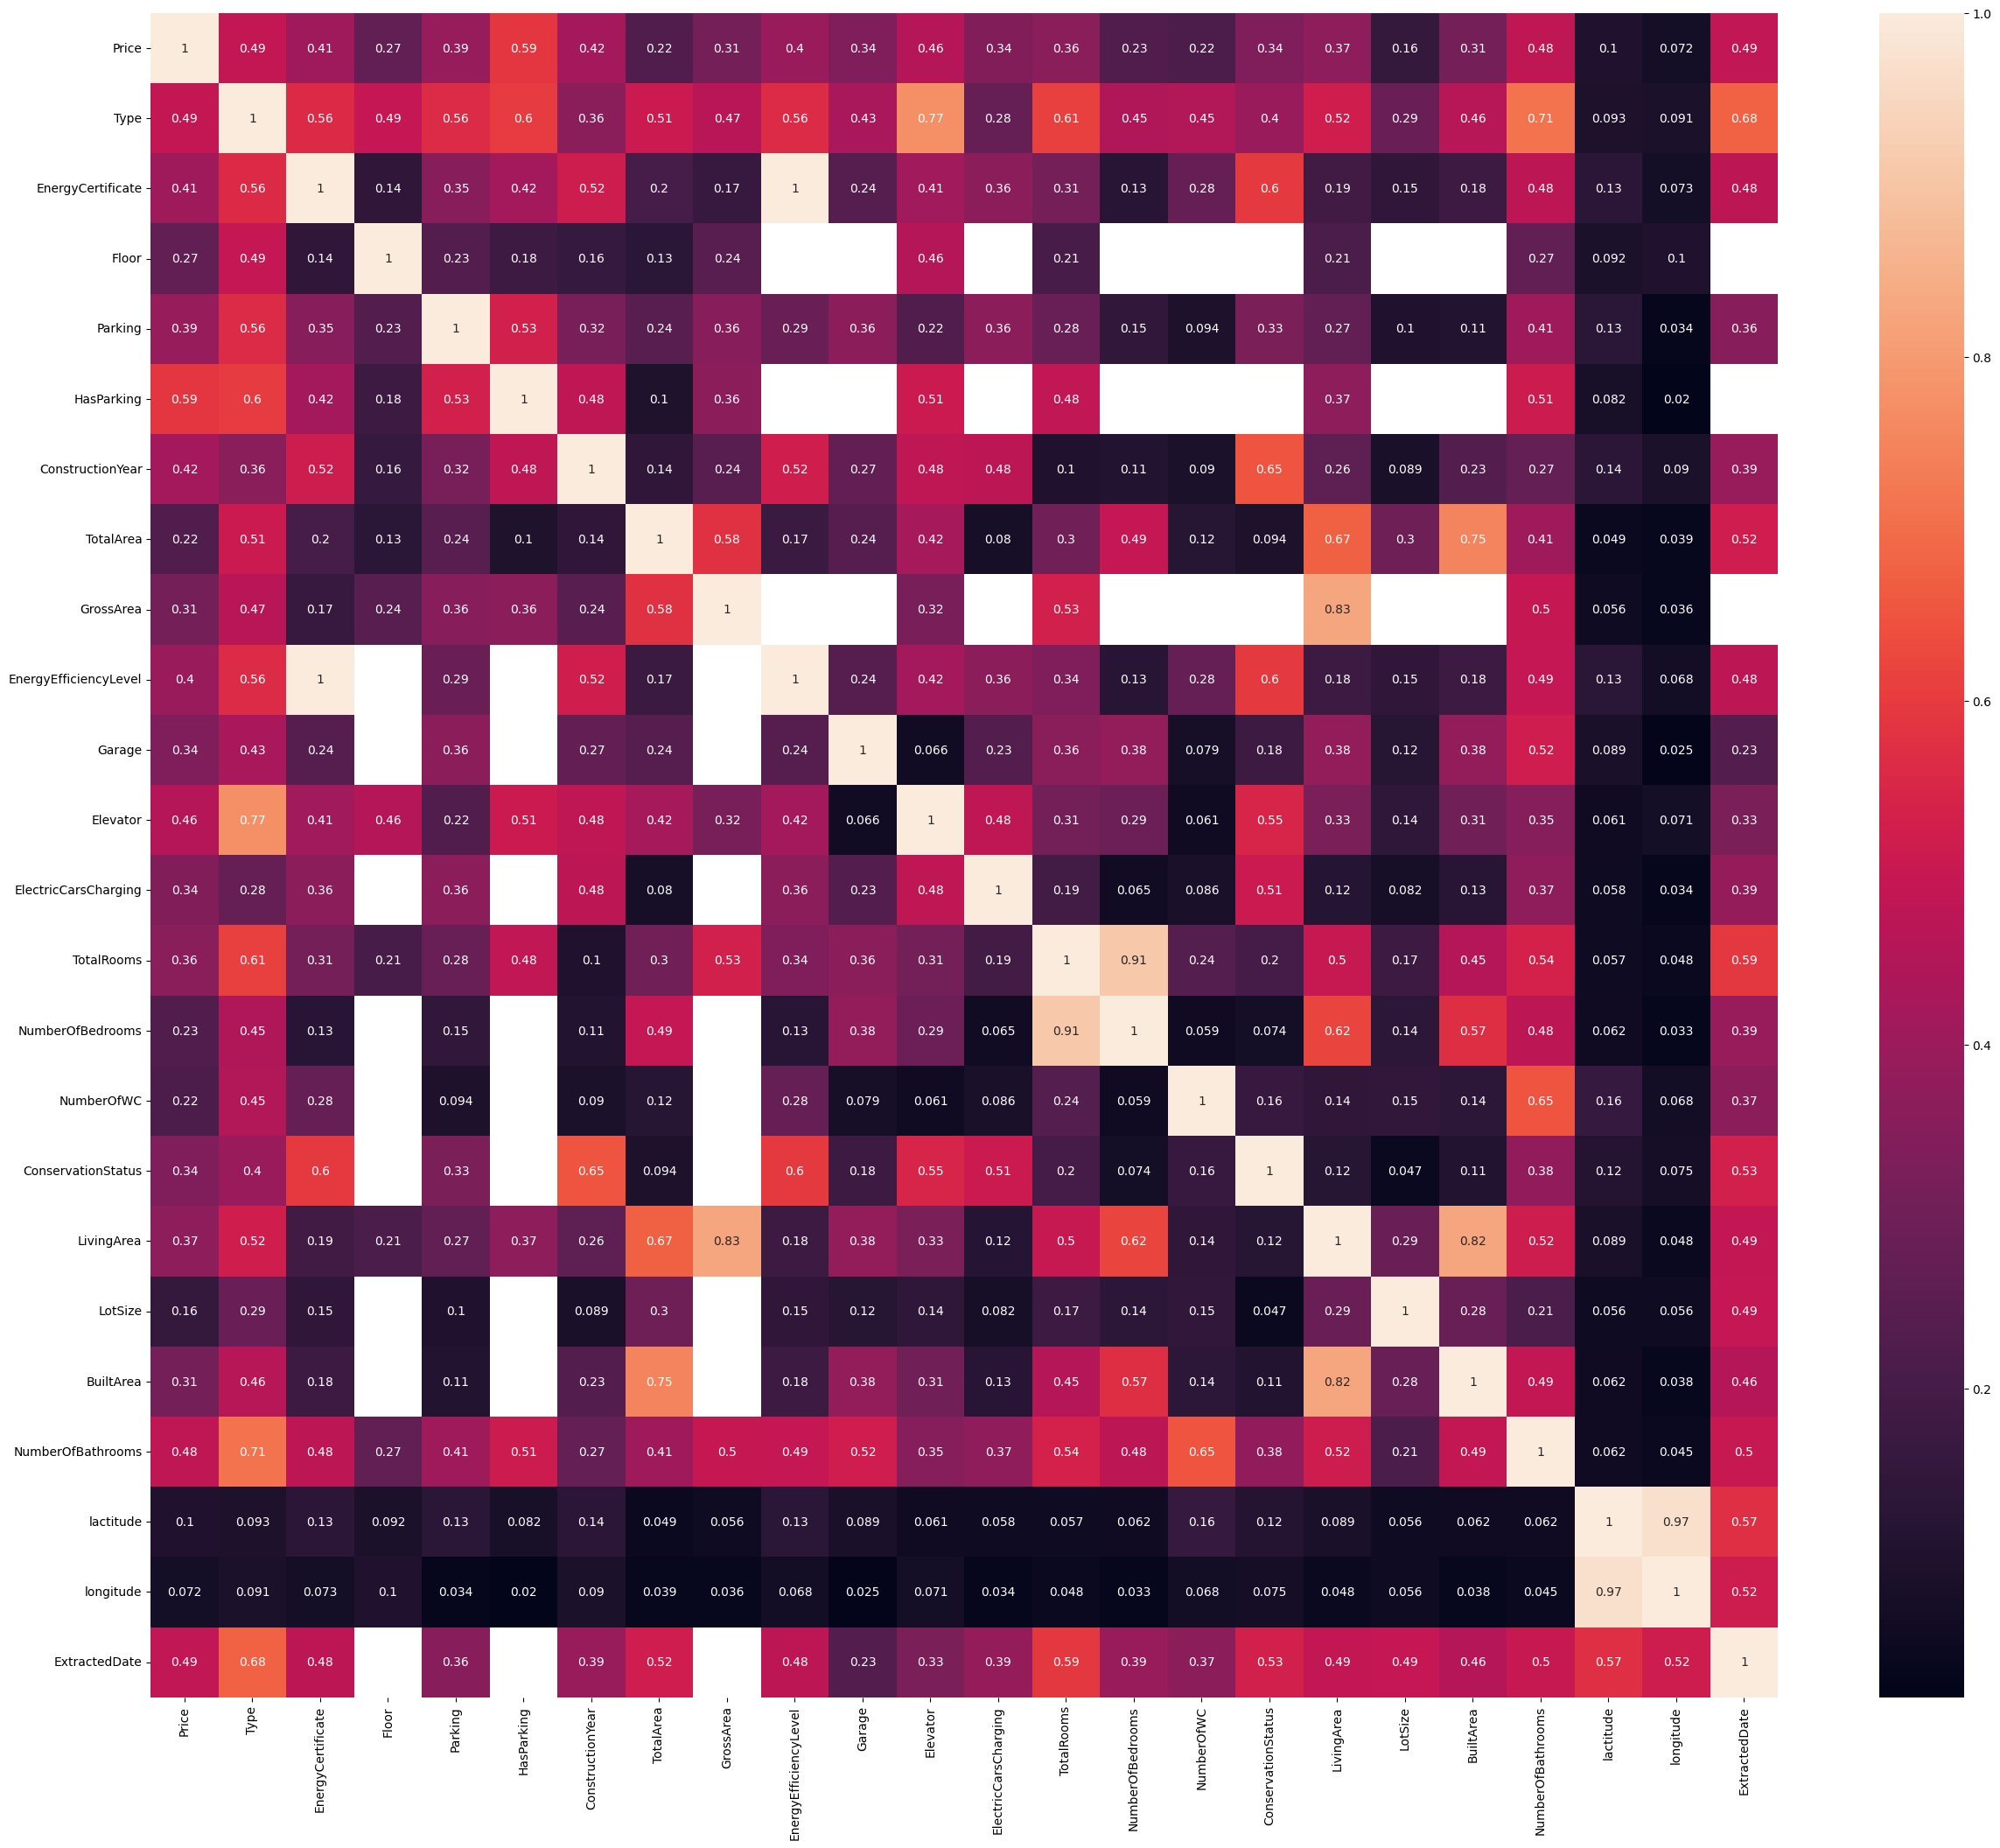

In [53]:
plt.figure(figsize=(30, 25))
sns.heatmap(df.drop(columns='District').phik_matrix(), annot=True)

In [63]:
df['Days_since_start'] = (df['ExtractedDate'] - df['ExtractedDate'].min()).dt.days
df = df.drop(columns='ExtractedDate')
df

,Price,District,Type,EnergyCertificate,Floor,Parking,HasParking,ConstructionYear,TotalArea,GrossArea,...,NumberOfBedrooms,NumberOfWC,ConservationStatus,LivingArea,LotSize,BuiltArea,NumberOfBathrooms,lactitude,longitude,Days_since_start
0,250000.0,Faro,Apartment,A+,2nd Floor,1.0,True,NaN,114.0,NaN,...,NaN,NaN,NaN,114.0,NaN,NaN,2.0,37.152962,-7.887914,NaN
1,9500.0,Faro,Apartment,NC,1st Floor,0.0,False,1990.0,27.0,NaN,...,NaN,NaN,NaN,27.0,NaN,NaN,1.0,37.088241,-8.252634,NaN
2,580000.0,Faro,Apartment,D,3rd Floor,1.0,True,2003.0,84.0,NaN,...,NaN,NaN,NaN,84.0,NaN,NaN,2.0,37.082980,-8.909612,NaN
3,350000.0,Faro,Apartment,C,4th Floor,0.0,False,1985.0,68.0,NaN,...,NaN,NaN,NaN,68.0,NaN,NaN,1.0,37.137581,-8.536843,NaN
4,175000.0,Faro,House,NC,NaN,0.0,False,1950.0,78.0,NaN,...,NaN,NaN,NaN,78.0,NaN,NaN,2.0,37.016273,-7.935177,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135531,349900.0,Vila Real,House,F,NaN,1.0,NaN,1982.0,188.0,NaN,...,3.0,1.0,NaN,190.0,680.0,238.00,3.0,41.606788,-7.310853,NaN
135532,77500.0,Vila Real,Apartment,NC,NaN,0.0,NaN,2010.0,39.0,NaN,...,1.0,NaN,New,39.0,NaN,60.00,1.0,41.823221,-7.792314,NaN
135533,50000.0,Vila Real,House,NC,NaN,1.0,NaN,1987.0,69.0,NaN,...,2.0,1.0,NaN,84.0,NaN,84.50,2.0,41.276862,-7.475379,NaN
135534,36000.0,Vila Real,Land,NC,NaN,0.0,NaN,NaN,90.0,NaN,...,NaN,0.0,NaN,NaN,300.0,240.88,0.0,41.266385,-7.575761,4508.0


In [64]:
df.columns

Index(['Price', 'District', 'Type', 'EnergyCertificate', 'Floor', 'Parking',
       'HasParking', 'ConstructionYear', 'TotalArea', 'GrossArea',
       'EnergyEfficiencyLevel', 'Garage', 'Elevator', 'ElectricCarsCharging',
       'TotalRooms', 'NumberOfBedrooms', 'NumberOfWC', 'ConservationStatus',
       'LivingArea', 'LotSize', 'BuiltArea', 'NumberOfBathrooms', 'lactitude',
       'longitude', 'Days_since_start'],
      dtype='object')

In [66]:
df['EnergyCertificate'].unique()

array(['A+', 'NC', 'D', 'C', 'A', 'B-', 'E', 'B', 'F', 'G',
       'Not available', nan, 'No Certificate'], dtype=object)

In [69]:
def encode(x):
    if x == 'A+':
        return 7.5
    elif x == 'A':
        return 7
    elif x == 'B':
        return 6
    elif x == 'B-':
        return 5.5
    elif x == 'C':
        return 4
    elif x == 'D':
        return 3
    elif x == 'E':
        return 2
    elif x == 'F':
        return 1
    elif x == 'G':
        return 0
    else:
        return None
    

In [71]:
df[['EnergyCertificate', 'EnergyEfficiencyLevel']] = df[['EnergyCertificate', 'EnergyEfficiencyLevel']].map(lambda x: encode(x))

In [81]:
si = SimpleImputer(strategy='most_frequent')
df[['EnergyCertificate', 'EnergyEfficiencyLevel']] = SimpleImputer(strategy='most_frequent').fit_transform(df[['EnergyCertificate', 'EnergyEfficiencyLevel']])

In [68]:
df['EnergyEfficiencyLevel'].unique()

array([nan, 'NC', 'F', 'D', 'B', 'C', 'E', 'B-', 'A', 'A+', 'G',
       'No Certificate'], dtype=object)

In [160]:
df1 = df.iloc[:50000]

In [161]:
X = df1.drop(columns='Price')
y = df1['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [162]:
df1

,Price,District,Type,EnergyCertificate,Floor,Parking,HasParking,ConstructionYear,TotalArea,GrossArea,...,NumberOfBedrooms,NumberOfWC,ConservationStatus,LivingArea,LotSize,BuiltArea,NumberOfBathrooms,lactitude,longitude,Days_since_start
0,250000.0,Faro,16.0,7.5,2nd Floor,1.0,True,NaN,114.0,NaN,...,NaN,NaN,NaN,114.0,NaN,NaN,2.0,37.152962,-7.887914,NaN
1,9500.0,Faro,16.0,4.0,1st Floor,0.0,False,1990.0,27.0,NaN,...,NaN,NaN,NaN,27.0,NaN,NaN,1.0,37.088241,-8.252634,NaN
2,580000.0,Faro,16.0,3.0,3rd Floor,1.0,True,2003.0,84.0,NaN,...,NaN,NaN,NaN,84.0,NaN,NaN,2.0,37.082980,-8.909612,NaN
3,350000.0,Faro,16.0,4.0,4th Floor,0.0,False,1985.0,68.0,NaN,...,NaN,NaN,NaN,68.0,NaN,NaN,1.0,37.137581,-8.536843,NaN
4,175000.0,Faro,14.0,4.0,NaN,0.0,False,1950.0,78.0,NaN,...,NaN,NaN,NaN,78.0,NaN,NaN,2.0,37.016273,-7.935177,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50112,640000.0,Porto,16.0,4.0,3rd Floor,2.0,True,NaN,104.0,NaN,...,NaN,NaN,NaN,104.0,NaN,NaN,2.0,41.130010,-8.605842,NaN
50113,800000.0,Porto,14.0,7.0,NaN,2.0,True,2023.0,223.0,NaN,...,NaN,NaN,NaN,222.0,NaN,NaN,2.0,41.180681,-8.682200,NaN
50114,285000.0,Porto,16.0,4.0,2nd Floor,1.0,True,NaN,56.0,NaN,...,NaN,NaN,NaN,56.0,NaN,NaN,1.0,41.130010,-8.605842,NaN
50115,325000.0,Aveiro,16.0,6.0,Ground Floor,2.0,True,2014.0,130.0,130.0,...,NaN,NaN,NaN,83.0,NaN,NaN,2.0,40.640496,-8.653784,NaN


In [163]:
num_cols = X_train.select_dtypes(include='number').columns
binary = X_train.nunique()[df.nunique() == 2].index
cat_cols = X_train.drop(columns=['Floor', 'Type', 'District']).select_dtypes(include='object').columns

In [115]:
features_order = list(df.groupby('Type')['Price'].mean().sort_values(ascending=True).index)

oe = OrdinalEncoder(categories=[features_order], handle_unknown='use_encoded_value', unknown_value=-1)

df[['Type']] = oe.fit_transform(df[['Type']])

In [116]:
features_order

['Storage',
 'Garage',
 'Other - Residential',
 'Transfer of lease',
 'Land',
 'Store',
 'Studio',
 'Office',
 'Estate',
 'Hotel',
 'Farm',
 'Other - Commercial',
 'Mansion',
 'Warehouse',
 'House',
 'Investment',
 'Apartment',
 'Industrial',
 'Building',
 'Duplex',
 'Manor']

In [140]:
df

,Price,District,Type,EnergyCertificate,Floor,Parking,HasParking,ConstructionYear,TotalArea,GrossArea,...,NumberOfBedrooms,NumberOfWC,ConservationStatus,LivingArea,LotSize,BuiltArea,NumberOfBathrooms,lactitude,longitude,Days_since_start
0,250000.0,Faro,16.0,7.5,2nd Floor,1.0,True,NaN,114.0,NaN,...,NaN,NaN,NaN,114.0,NaN,NaN,2.0,37.152962,-7.887914,NaN
1,9500.0,Faro,16.0,4.0,1st Floor,0.0,False,1990.0,27.0,NaN,...,NaN,NaN,NaN,27.0,NaN,NaN,1.0,37.088241,-8.252634,NaN
2,580000.0,Faro,16.0,3.0,3rd Floor,1.0,True,2003.0,84.0,NaN,...,NaN,NaN,NaN,84.0,NaN,NaN,2.0,37.082980,-8.909612,NaN
3,350000.0,Faro,16.0,4.0,4th Floor,0.0,False,1985.0,68.0,NaN,...,NaN,NaN,NaN,68.0,NaN,NaN,1.0,37.137581,-8.536843,NaN
4,175000.0,Faro,14.0,4.0,NaN,0.0,False,1950.0,78.0,NaN,...,NaN,NaN,NaN,78.0,NaN,NaN,2.0,37.016273,-7.935177,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135531,349900.0,Vila Real,14.0,1.0,NaN,1.0,NaN,1982.0,188.0,NaN,...,3.0,1.0,NaN,190.0,680.0,238.00,3.0,41.606788,-7.310853,NaN
135532,77500.0,Vila Real,16.0,4.0,NaN,0.0,NaN,2010.0,39.0,NaN,...,1.0,NaN,New,39.0,NaN,60.00,1.0,41.823221,-7.792314,NaN
135533,50000.0,Vila Real,14.0,4.0,NaN,1.0,NaN,1987.0,69.0,NaN,...,2.0,1.0,NaN,84.0,NaN,84.50,2.0,41.276862,-7.475379,NaN
135534,36000.0,Vila Real,4.0,4.0,NaN,0.0,NaN,NaN,90.0,NaN,...,NaN,0.0,NaN,NaN,300.0,240.88,0.0,41.266385,-7.575761,4508.0


In [147]:
df.groupby('District')['Price'].mean().sort_values(ascending=True)

District
Castelo Branco           85261.224557
Viseu                    96898.181818
Guarda                   97163.007493
Portalegre              117342.363217
Ilha da Madeira         131434.375000
Bragança                139974.390105
Santarém                141639.879302
Vila Real               147312.574074
Ilha de Santa Maria     149055.112450
Ilha das Flores         150000.000000
Coimbra                 155464.171834
Ilha do Faial           160000.000000
Viana do Castelo        169699.581764
Leiria                  182068.153972
Beja                    190094.053125
Évora                   194985.944213
Aveiro                  203625.168102
Ilha de Porto Santo     207419.148936
Braga                   211924.400966
Ilha Terceira           212495.238095
Ilha de São Jorge       260000.000000
Porto                   264318.346627
Faro                    267795.266322
Ilha de São Miguel      268365.454545
Setúbal                 295978.608658
Lisboa                  309715.174002
Z -

In [127]:
df.groupby(['Type', 'Floor'])['Price'].mean()

[[Type   Floor           
  -1.0   1st Floor           400000.000000
         Ground Floor         50000.000000
   0.0   4th Floor            25000.000000
         Basement             62900.000000
         Basement Level       56708.333333
                                 ...      
   19.0  Above 10th Floor    287000.000000
         Duplex              371090.909091
         Ground Floor        397639.352941
         Top Floor           273333.333333
         Triplex             125000.000000
  Name: Price, Length: 141, dtype: float64]]

In [164]:
class BinaryEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
        self.feature_idx_ = None

    def fit(self, X, y=None):
        # Сохраняем индексы колонок для numpy array
        if isinstance(X, np.ndarray):
            self.feature_idx_ = np.arange(X.shape[1])
        return self

    def transform(self, X):
        # Преобразуем входные данные в numpy array если это еще не сделано
        X_arr = np.array(X_train) if not isinstance(X, np.ndarray) else X.copy()
        # Преобразуем все значения в int
        return X_arr.astype(int)
    
    
# class PriceRelatedOrdinalEncoder(BaseEstimator, TransformerMixin):
#     def __init__(self, cols_to_encode):
#         self.cols_to_encode = cols_to_encode
#         self.order = {}
#         self.enoder = None            
    
#     def fit(self, X, y=None):
#         for col in self.cols_to_encode:
#             self.order[col] =  list(X.groupby(col)['Price'].agg('mean').sort_values(ascending=True).index)
        
#         self.encoder = OrdinalEncoder(categories=list(self.order.values()), handle_unknown='use_encoded_value', unknown_value=-1)
#         self.encoder.fit(X[list(self.order.keys())])
        
#         return self
    
#     def transform(self, X):
#         X_transformed = X.copy()
#         X_transformed[self.order.keys()] = self.encoder.transform(X[self.order.keys()])
        
#         return X_transformed

class PriceRelatedOrdinalEncoder:
    def __init__(self, cols_to_encode):
        self.cols_to_encode = cols_to_encode
        self.order = {}
        self.encoder = None
        
    def fit(self, X, y=None):
        # Преобразуем numpy массив в DataFrame
        X_df = pd.DataFrame(X, columns=self.cols_to_encode)
        X_df['Price'] = y  # Добавляем столбец с ценами
        
        for col in self.cols_to_encode:
            self.order[col] = list(X_df.groupby(col)['Price'].agg('mean').sort_values(ascending=True).index)
        
        self.encoder = OrdinalEncoder(categories=list(self.order.values()), 
                                    handle_unknown='use_encoded_value', 
                                    unknown_value=-1)
        self.encoder.fit(X_df[self.cols_to_encode])
        return self
        
    def transform(self, X):
        # Преобразуем входные данные в DataFrame если это numpy массив
        if isinstance(X, np.ndarray):
            X = pd.DataFrame(X, columns=self.cols_to_encode)
            
        return self.encoder.transform(X[self.cols_to_encode])
            
            

In [165]:
def create_pipeline(trial):
    num_pipeline = Pipeline([
        ('imputer', KNNImputer(n_neighbors=5)),
        ('scaler', PowerTransformer())
    ])
    cat_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OrdinalEncoder())
    ])
    binary_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', BinaryEncoder(columns=binary)),
        ('scaler', PowerTransformer())
    ])
    price_related = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', PriceRelatedOrdinalEncoder(cols_to_encode=['Type', 'Floor', 'District'])),
        ('scaler', PowerTransformer())
    ])
    
    
    model = trial.suggest_categorical('model', ['lgbm', 'xgb'])
    
    if model == 'xgb':
        n_estimators = 300
        learning_rate = trial.suggest_float('learning_rate', 0.001, 0.3)
        max_depth = trial.suggest_int('max_depth', 1, 10)
        reg_alpha = trial.suggest_float('reg_alpha', 0.1, 4)
        reg_lambda = trial.suggest_float('reg_lambda', 0.01, 1)
        regressor = XGBRegressor(n_estimators=n_estimators, 
                             learning_rate=learning_rate, 
                             max_depth=max_depth,
                             reg_alpha=reg_alpha,
                             reg_lambda=reg_lambda)
        
    else: 
        n_estimators = 300
        learning_rate = trial.suggest_float('learning_rate', 0.001, 0.3)
        max_depth = trial.suggest_int('max_depth', 1, 10)
        reg_alpha = trial.suggest_float('reg_alpha', 0.1, 4)
        reg_lambda = trial.suggest_float('reg_lambda', 0.01, 1)
        regressor = LGBMRegressor(n_estimators=n_estimators, 
                             learning_rate=learning_rate, 
                             max_depth=max_depth,
                             reg_alpha=reg_alpha,
                             reg_lambda=reg_lambda, 
                             verbosity=0)
    
    
    pipeline = Pipeline([
        ('transform', ColumnTransformer([
            ('num', num_pipeline, num_cols),
            ('cat', cat_pipeline, cat_cols),
            ('binary', binary_pipeline, binary),
            ('price_related', price_related, ['Type', 'Floor', 'District'])
        ])),
        ('model', regressor)
    ])
    return pipeline
    
def objective(trial):
    pipeline_opt = create_pipeline(trial)
    pipeline_opt.fit(X_train, y_train)
    metric = mean_absolute_error(y_test, pipeline_opt.predict(X_test))
    return metric


study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

print("Лучшие параметры:", study.best_params) 
print("Лучшая точность:", study.best_value) 

# Итоговый пайплайн с лучшими параметрами
best_trial = study.best_trial
final_pipeline = create_pipeline(best_trial)
final_pipeline.fit(X_train, y_train)
        

[I 2025-02-28 22:41:00,717] A new study created in memory with name: no-name-4671af1e-762e-411f-9c32-2d5787c287e1
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/numpy/_core/_methods.py:188: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
[I 2025-02-28 22:41:43,904] Trial 0 finished with value: 79247.01766361906 and parameters: {'model': 'lgbm', 'learning_rate': 0.16351128652173988, 'max_depth': 6, 'reg_alpha': 1.4805918202319182, 'reg

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
[I 2025-02-28 22:43:48,754] Trial 3 finished with value: 79395.7677491069 and parameters: {'model': 'lgbm', 'learning_rate': 0.2856835529343775, 'max_depth': 7, 'reg_alpha': 0.8070688136296446, 'reg_l

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
[I 2025-02-28 22:44:29,946] Trial 4 finished with value: 96641.64767280745 and parameters: {'model': 'lgbm', 'learning_rate': 0.13065071305708423, 'max_depth': 1, 'reg_alpha': 2.994947553731517, 'reg_

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
[I 2025-02-28 22:54:18,982] Trial 18 finished with value: 81187.24942172055 and parameters: {'model': 'lgbm', 'learning_rate': 0.19178887247467893, 'max_depth': 4, 'reg_alpha': 1.5181223288585532, 're

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
[I 2025-02-28 22:59:58,696] Trial 26 finished with value: 78626.6524612586 and parameters: {'model': 'lgbm', 'learning_rate': 0.13592256157020144, 'max_depth': 8, 'reg_alpha': 3.0978521492127737, 'reg

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
[I 2025-02-28 23:02:05,117] Trial 29 finished with value: 79834.08901744073 and parameters: {'model': 'lgbm', 'learning_rate': 0.16958605347030464, 'max_depth': 5, 'reg_alpha': 3.8531911903935754, 're

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
[I 2025-02-28 23:07:10,853] Trial 36 finished with value: 79600.30549630368 and parameters: {'model': 'lgbm', 'learning_rate': 0.09063757411250109, 'max_depth': 7, 'reg_alpha': 1.2277679153776928, 're

Лучшие параметры: {'model': 'xgb', 'learning_rate': 0.06747048754087821, 'max_depth': 10, 'reg_alpha': 2.7428029417005613, 'reg_lambda': 0.9457813633431938}
Лучшая точность: 75235.06263193868


/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/numpy/_core/_methods.py:188: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(


Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   PowerTransformer())]),
                                                  Index(['Type', 'EnergyCertificate', 'Parking', 'ConstructionYear', 'TotalArea',
       'GrossArea', 'EnergyEfficiencyLevel', 'TotalRooms', 'NumberOfBedrooms',
       'NumberOfWC', 'LivingArea', 'LotSize', 'BuiltArea', 'NumberOfBathrooms...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None,
                              learning_rate=0.06747048754087821, max_bin=None,
                              max_cat_threshold=None, max_cat_to_onehot=None,
                              max_delta_step=None, max_depth=10,
                              max_leaves=None, min_child_weight=None,
                              missing=nan, monotone_constraints=None,
                              multi_strategy=None, n_estimators=300,
                              n_jobs=None, num_parallel_tree=None,
                              random_state=None, ...))])

In [166]:
study.best_params, study.best_value

({'model': 'xgb',
  'learning_rate': 0.06747048754087821,
  'max_depth': 10,
  'reg_alpha': 2.7428029417005613,
  'reg_lambda': 0.9457813633431938},
 75235.06263193868)

In [100]:
X_train

,District,Type,EnergyCertificate,Floor,Parking,HasParking,ConstructionYear,TotalArea,GrossArea,EnergyEfficiencyLevel,...,TotalRooms,NumberOfBedrooms,NumberOfWC,ConservationStatus,LivingArea,LotSize,BuiltArea,NumberOfBathrooms,lactitude,longitude
926,Faro,Store,D,NaN,0.0,False,2003.0,768.0,164.0,NaN,...,NaN,NaN,NaN,NaN,118.0,NaN,NaN,NaN,37.139548,-8.023260
2968,Faro,House,A,NaN,0.0,False,2022.0,91.0,91.0,NaN,...,1.0,NaN,NaN,NaN,91.0,NaN,NaN,2.0,37.161739,-8.503517
490,Faro,Apartment,E,5th Floor,1.0,True,1999.0,86.0,86.0,NaN,...,1.0,NaN,NaN,NaN,60.0,NaN,NaN,1.0,37.139548,-8.023260
2516,Faro,Apartment,A,Duplex,2.0,True,2023.0,175.0,NaN,NaN,...,3.0,NaN,NaN,NaN,136.0,NaN,NaN,4.0,37.139548,-8.023260
2432,Faro,Apartment,A,1st Floor,1.0,True,2022.0,236.0,101.0,NaN,...,2.0,NaN,NaN,NaN,101.0,NaN,NaN,2.0,37.161739,-8.503517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,Faro,Apartment,NC,Ground Floor,0.0,True,1990.0,30.0,30.0,NaN,...,0.0,NaN,NaN,NaN,30.0,NaN,NaN,1.0,37.088241,-8.252634
280,Faro,Apartment,A+,6th Floor,1.0,True,2023.0,750.0,106.0,NaN,...,2.0,NaN,NaN,NaN,79.0,NaN,NaN,2.0,37.137581,-8.536843
1205,Faro,Apartment,NC,8th Floor,1.0,True,2000.0,78.0,78.0,NaN,...,1.0,NaN,NaN,NaN,78.0,NaN,NaN,1.0,37.139548,-8.023260
1923,Guarda,House,F,NaN,0.0,False,1951.0,191.0,310.0,NaN,...,3.0,NaN,NaN,NaN,140.0,NaN,NaN,0.0,40.930394,-7.251758
